In [1]:
%matplotlib inline

import pandas
import seaborn

import pgdata

db = pgdata.connect()

# Get all salmon records that aren't in waterbodies
# This returns a record for every location/species combination
sql = """SELECT 
           fish_obsrvtn_distinct_id,
           edge_description, 
           waterbody_type,
           vertex_from_elevation,
           vertex_to_elevation,
           vertex_length,
           vertex_slope,
           segment_from_elevation,
           segment_to_elevation,
           segment_length,
           segment_slope,
           species_code,
           species_name
         FROM temp.obs_spp_by_slope 
         WHERE waterbody_type NOT IN ('X', 'L', 'W')
         AND species_code IN ('CH', 'CM', 'CO', 'PK', 'SK')
         ORDER BY fish_obsrvtn_distinct_id, species_code
"""
all_spp = pandas.read_sql_query(sql, db.engine)

In [2]:
all_spp.head()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,CH,Chinook Salmon
1,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,CO,Coho Salmon
2,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,SK,Sockeye Salmon
3,6,"Construction line, connection",R,122.00,122.00,853.06,0.00,122.000,122.000,867.69,0.00,CO,Coho Salmon
4,10,"Construction line, connection",R,234.25,234.94,421.43,0.17,234.249,235.000,483.99,0.16,CH,Chinook Salmon


In [3]:
all_spp.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000
mean,24276.691538,208.440494,209.263219,109.124568,7.359646,208.440453,213.259379,606.089464,1.031920
std,17401.897537,268.308207,268.084122,154.479173,541.930431,268.308068,268.218727,657.611423,3.599174
min,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.960000,0.000000
25%,9519.250000,15.000000,15.260000,36.280000,0.000000,15.000000,18.203000,189.460000,0.020000
50%,20404.000000,69.150000,69.690000,67.060000,0.310000,69.148000,74.541000,407.220000,0.370000
75%,36644.000000,342.330000,343.000000,127.667500,1.407500,342.330000,348.500000,804.717500,1.040000
max,68367.000000,1318.000000,1318.150000,2993.610000,55499.900000,1318.000000,1320.000000,8153.200000,90.060000


In [5]:
# describing the unique observations that we are working with is probably more valuable
unique_pts = all_spp.drop_duplicates('fish_obsrvtn_distinct_id')
unique_pts.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000
mean,25759.329377,236.389541,237.122974,108.641829,10.306866,236.389483,241.064108,611.718443,0.888140
std,17821.096418,283.040101,282.853304,147.055344,693.643926,283.039950,282.840102,638.292128,2.554404
min,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.960000,0.000000
25%,10142.000000,19.000000,19.280000,36.095000,0.000000,19.000000,23.134000,200.085000,0.010000
50%,23648.000000,86.750000,87.340000,67.460000,0.280000,86.751000,91.997000,411.970000,0.340000
75%,39607.000000,410.670000,411.620000,130.150000,1.280000,410.667000,423.922000,823.850000,0.980000
max,68367.000000,1318.000000,1318.150000,2993.610000,55499.900000,1318.000000,1320.000000,8153.200000,90.060000


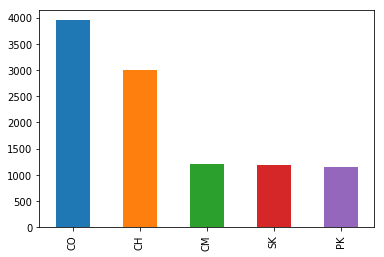

In [6]:
# how many unique locations per spp?
pandas.value_counts(all_spp['species_code']).plot.bar()

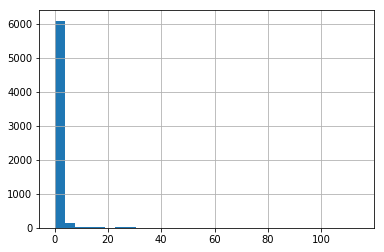

In [37]:
# generally compare the two slope values, where length of the edge between vertices is > 5m
edge_gt1m = unique_pts[unique_pts['vertex_length'] > 5]

diff = edge_gt1m['vertex_slope'] - edge_gt1m['segment_slope']
diff = diff.abs()
diff.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153263c8>]],
      dtype=object)

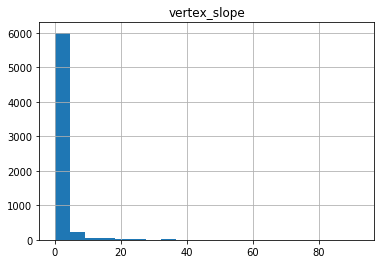

In [7]:
# histogram of slopes between vertexes where slope < 100%
unique_pts[unique_pts['vertex_slope'] < 100].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1155ba4e0>]],
      dtype=object)

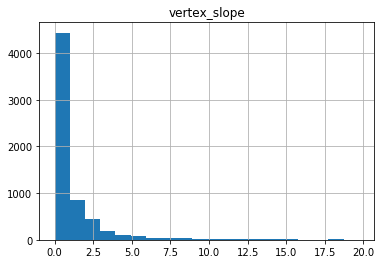

In [8]:
# histogram of slopes between vertexes where slope < 20%
unique_pts[unique_pts['vertex_slope'] < 20].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115939588>]],
      dtype=object)

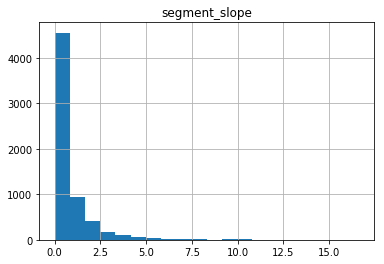

In [9]:
# histogram of segment slopes where slope < 20%
unique_pts[unique_pts['segment_slope'] < 20].hist(column='segment_slope', bins=20)

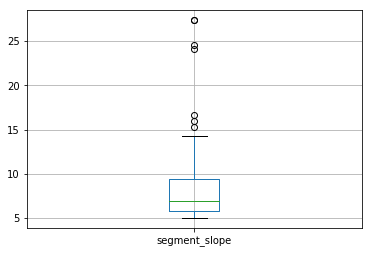

In [52]:
# try a box plot for all unique points, segment slopes 5 - 20%

df = unique_pts[unique_pts['segment_slope'] < 30]
df[df['segment_slope'] > 5].boxplot(column=['segment_slope'])

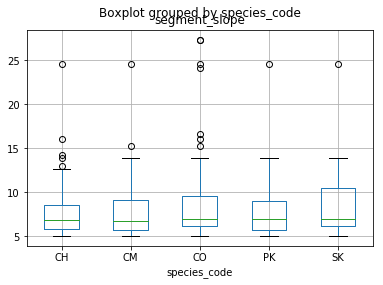

In [45]:
# try boxplot of all spp
df_sp = all_spp
df_sp = df_sp[df_sp['segment_slope'] < 30] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column='segment_slope', by='species_code')

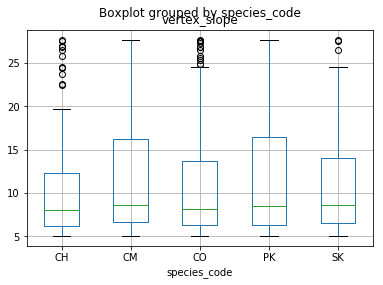

In [44]:
# try the same using the slope at the point
df_sp = all_spp
df_sp = df_sp[df_sp['vertex_slope'] < 30] 
df_sp = df_sp[df_sp['vertex_slope'] > 5] 
df_sp.boxplot(column='vertex_slope', by='species_code')

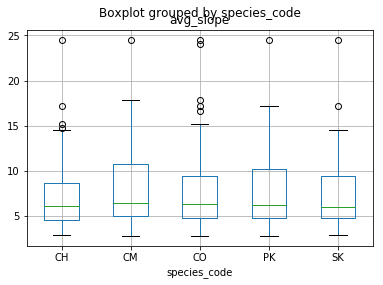

In [49]:
# try averaging the two slopes
df_sp = all_spp

# trim off outliers/flat values first
df_sp = df_sp[df_sp['vertex_slope'] < 30] 
df_sp = df_sp[df_sp['vertex_slope'] > 5]

# take average
df_sp['avg_slope'] = (df_sp['vertex_slope'] + df_sp['segment_slope']) / 2

df_sp.boxplot(column='avg_slope', by='species_code')